In [113]:
import matplotlib.pyplot as plt

In [105]:
class GamblerEnvironment:
    def __init__(self, prob_heads):
        self.prob_heads = prob_heads
        self.prob_tails = 1 - prob_heads

        self.states = list(range(101))

    def transition_heads(self, state, action):
        return state + action
    
    def transition_tails(self, state, action):
        return state - action
    
    def valid_state_actions(self, state):
        return list(range(1, min(state + 1, 100 - state + 1)))
    
    def reward(self, initial_state, final_state, action):
        return 1 if final_state == 100 else 0
    
    def transition_probabilities(self, state, action):
        return [
            (self.prob_heads, self.transition_heads(state, action)),
            (self.prob_tails, self.transition_tails(state, action))
        ]
    
    def non_terminal_states(self):
        return self.states[1:-1]

In [146]:
def value_iteration(env, theta=1e-4, gamma=1):
    value = [0] * len(env.states)

    value_history = [value.copy()]

    while True:
        delta = 0
        for state in env.non_terminal_states():
            v = value[state]

            value[state] = max(
                [
                    sum(
                        [
                            prob
                            * (
                                env.reward(state, next_state, action)
                                + gamma * value[next_state]
                            )
                            for prob, next_state in env.transition_probabilities(
                                state, action
                            )
                        ]
                    )
                    for action in env.valid_state_actions(state)
                ]
            )

            delta = max(delta, abs(v - value[state]))

        value_history.append(value.copy())

        if delta < theta:
            break

    policy = [None] * len(env.states)

    for state in env.non_terminal_states():
        policy[state] = max(
            env.valid_state_actions(state),
            key=lambda action: sum(
                [
                    prob
                    * (
                        env.reward(state, next_state, action)
                        + gamma * value[next_state]
                    )
                    for prob, next_state in env.transition_probabilities(state, action)
                ]
            ),
        )

    return value, policy, value_history

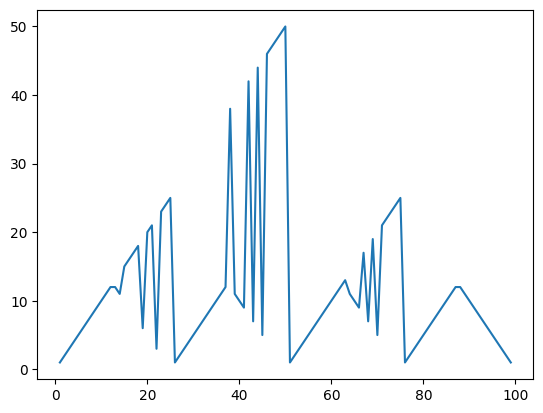

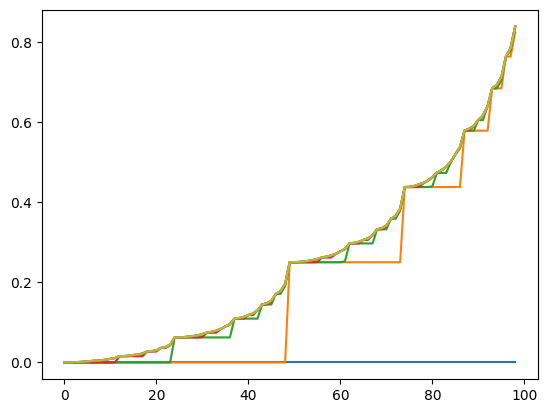

In [151]:
env = GamblerEnvironment(0.25)
value, policy, value_history = value_iteration(env)
plt.plot(env.states[1:-1], policy[1:-1])
plt.show()

value_history = [value[1:-1] for value in value_history]
for value in value_history:
    plt.plot(value)

plt.show()

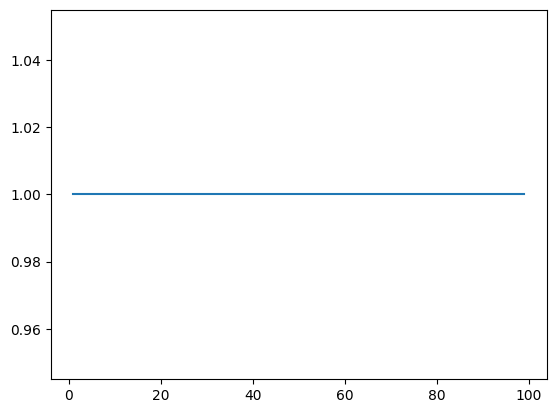

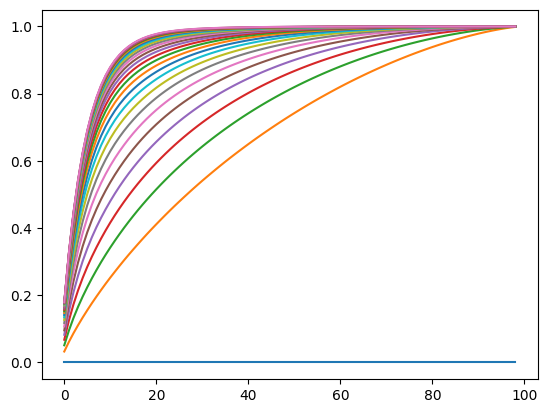

In [156]:
env = GamblerEnvironment(0.55)
value, policy, value_history = value_iteration(env)
plt.plot(env.states[1:-1], policy[1:-1])
plt.show()

value_history = [value[1:-1] for value in value_history]
for value in value_history[::20] + [value_history[-1]]:
    plt.plot(value)

plt.show()